## 1-Importer les librairies necessaires 

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER pour le sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
finviz_url = 'https://finviz.com/quote.ashx?t='

## 2-Stocker les donnees concernant la date, le temps et les titres 

In [2]:
news_tables = {}
tickers = ['AMZN', 'BABA', 'EBAY']
for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # lire le contenu du fichier en 'html' 
    html = BeautifulSoup(response)
    # trouver 'news-table' dans the Soup et le charger dans'news_table'
    news_table = html.find(id='news-table')
    # ajouter la table dans notre dictionnaire
    news_tables[ticker] = news_table

## 3-Generer les donnees stockes dans News_tables

In [3]:
# generer Amazon news_table 
AMAZ = news_tables['AMZN']

# avoir dans la variable AMAZ_tr toutes les lignes de la table de la balise <tr> dans le fichier html 
AMAZ_tr = AMAZ.findAll('tr')

for i, row in enumerate(AMAZ_tr):
    
    # lire la date et le temps ( dans l'element td ) sous forme de texte 
    time_date = row.td.text
    
    # lire le titre ( dans l'element a ) sous forme de texte
    headline = row.a.text
    
    # generer le contenu de headline et time_date 
    print(headline)
    print(time_date)
    
    # sortir apres generation de 4 lignes de donnees 
    if i == 3:
        break

2 Must-See Earnings Reports This Week
Oct-31-21 09:45AM  
Huge Silver Linings Underneath Amazon and Apple Earnings "Disappointments"
08:00AM  
3 Warren Buffett Stocks to Buy in November
07:31AM  
What Makes Cannabis Stock Jushi's Growth Strategy Stand Out?
07:15AM  


## 4-Generer les donnees en une liste python 

In [4]:
parsed_news = []

# Iterer a travers les articles 
for file_name, news_table in news_tables.items():
    
    # Iterer a travers toutes les balises tr Iterate dans 'news_table'
    for x in news_table.findAll('tr'):
        
        # lire le titre a partir de chaque balise tr sous format text et generer le texte de a uniquement .
        headline = x.a.get_text() 
        
        # diviser le texte dans la balise td en une liste 
        date_scrape = x.td.text.split()
        
        # si la longueur de  'date_scrape' est 1, on genere'time' comme l'element unique

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # sinon,on genere 'date' comme le premier element ,et le 'time' comme le second     
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # extraire le ticker du file name et le placer dans la premiere position de la liste  
        ticker = file_name.split('_')[0]
        
        # ajouter le ticker, date, time et headline comme liste a la liste 'parsed_news' 
        parsed_news.append([ticker, date, time, headline])
        
parsed_news

[['AMZN', 'Oct-31-21', '09:45AM', '2 Must-See Earnings Reports This Week'],
 ['AMZN',
  'Oct-31-21',
  '08:00AM',
  'Huge Silver Linings Underneath Amazon and Apple Earnings "Disappointments"'],
 ['AMZN',
  'Oct-31-21',
  '07:31AM',
  '3 Warren Buffett Stocks to Buy in November'],
 ['AMZN',
  'Oct-31-21',
  '07:15AM',
  "What Makes Cannabis Stock Jushi's Growth Strategy Stand Out?"],
 ['AMZN',
  'Oct-30-21',
  '03:41PM',
  "Amazon's E-Commerce Empire Is Showing Cracks"],
 ['AMZN', 'Oct-30-21', '11:52AM', 'Why These 10 Stocks Trended This Week'],
 ['AMZN',
  'Oct-30-21',
  '11:30AM',
  'Amazon Adds Another 133,000 Employees in Q3: the Costs Are Adding Up'],
 ['AMZN',
  'Oct-30-21',
  '10:29AM',
  'Were Hedge Funds Right About Amazon.com (AMZN)?'],
 ['AMZN',
  'Oct-30-21',
  '08:22AM',
  '3 Reasons to Buy Microsoft, And 1 Reason to Sell'],
 ['AMZN',
  'Oct-30-21',
  '07:30AM',
  '3 Foundational Stocks for a Future-Proof Portfolio'],
 ['AMZN',
  'Oct-30-21',
  '06:26AM',
  'Could This Meg

In [5]:
# Intancier le sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# definir les noms de colonnes 
columns = ['ticker', 'date', 'time', 'headline']

# Convertir the parsed_news list en DataFrame nommé 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterer a travers the headlines et obtenir les scores de polarites en utilisant vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Converir la liste des 'scores' des dicts en DataFrame
scores_df = pd.DataFrame(scores)

# Joindre les DataFrames des news and la list des dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convertir la colonne date de string en datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2021-10-31,09:45AM,2 Must-See Earnings Reports This Week,0.0,1.000,0.000,0.0000
1,AMZN,2021-10-31,08:00AM,Huge Silver Linings Underneath Amazon and Appl...,0.0,0.636,0.364,0.4588
2,AMZN,2021-10-31,07:31AM,3 Warren Buffett Stocks to Buy in November,0.0,1.000,0.000,0.0000
3,AMZN,2021-10-31,07:15AM,What Makes Cannabis Stock Jushi's Growth Strat...,0.0,0.755,0.245,0.3818
4,AMZN,2021-10-30,03:41PM,Amazon's E-Commerce Empire Is Showing Cracks,0.0,1.000,0.000,0.0000


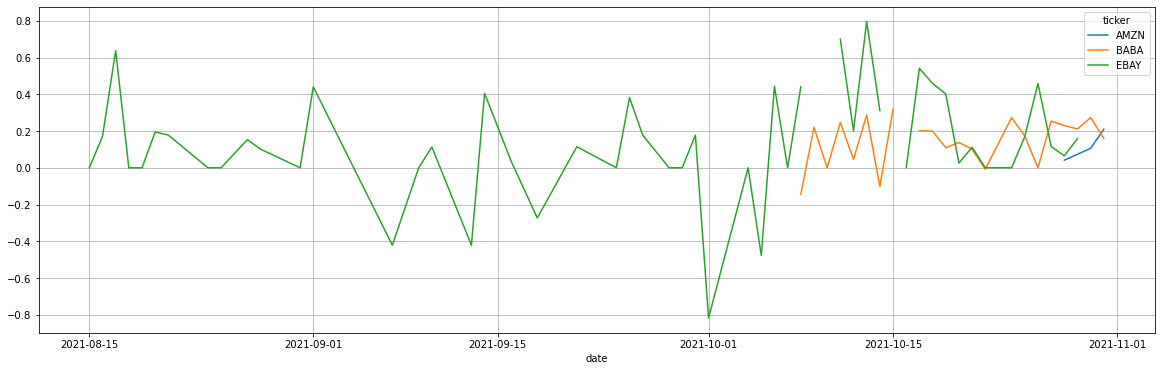

In [6]:
plt.rcParams['figure.figsize'] = [20, 6]

# Grouper par les colonnes date et ticker de scored_news et calculer la moyenne
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# dépiler la column ticker
mean_scores = mean_scores.unstack()

# obtenir le cross-section du compound dans 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# tracer le bar chart avec pandas
mean_scores.plot(kind = 'line')
plt.grid()